In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import graphviz

In [2]:
# from google.colab import files

# # Bilgisayardan dosya yükleme.
# uploaded = files.upload()

In [3]:
dataset = pd.read_csv('datat.csv')

dataset


,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian,G3
0,F,18,4,4,2,0,4,3,3,6,U,mother,6
1,F,17,1,1,2,0,5,3,3,4,U,father,6
2,F,15,1,1,2,3,4,3,3,10,U,mother,10
3,F,15,4,2,3,0,3,2,5,2,U,mother,15
4,F,16,3,3,2,0,4,3,5,4,U,father,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,M,20,2,2,2,2,5,5,4,11,U,other,9
786,M,17,3,1,1,0,2,4,2,3,U,mother,16
787,M,21,1,1,1,3,5,5,3,3,R,other,7
788,M,18,3,2,1,0,4,4,5,0,R,mother,10


In [4]:

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        790 non-null    object
 1   age        790 non-null    int64 
 2   Medu       790 non-null    int64 
 3   Fedu       790 non-null    int64 
 4   studytime  790 non-null    int64 
 5   failures   790 non-null    int64 
 6   famrel     790 non-null    int64 
 7   freetime   790 non-null    int64 
 8   health     790 non-null    int64 
 9   absences   790 non-null    int64 
 10  address    790 non-null    object
 11  guardian   790 non-null    object
 12  G3         790 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 80.4+ KB


In [5]:
dataset.columns

Index(['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel',
       'freetime', 'health', 'absences', 'address', 'guardian', 'G3'],
      dtype='object')

In [6]:

dataset.isna().sum()


sex          0
age          0
Medu         0
Fedu         0
studytime    0
failures     0
famrel       0
freetime     0
health       0
absences     0
address      0
guardian     0
G3           0
dtype: int64

In [7]:

def quanqual(dataset):
    quan = []
    qual = []
    for ColumnName in dataset.columns:
        if dataset[ColumnName].dtype == 'O':
            qual.append(ColumnName)
        else:
            quan.append(ColumnName)
    return quan,qual


In [8]:

quan, qual=quanqual(dataset)


quan


['age',
 'Medu',
 'Fedu',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'health',
 'absences',
 'G3']

In [9]:
qual

['sex', 'address', 'guardian']

In [10]:
def Univariate(dataset,quan):
    descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule',
                                      'lesser','greater','min','max','skew','kurtosis'], columns=quan)

    for ColumnName in quan:
        descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
        descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
        descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
        descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
        descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
        descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
        descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
        descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
        descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
        descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
        descriptive.loc['max', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['skew', ColumnName]=dataset[ColumnName].skew()
        descriptive.loc['kurtosis', ColumnName]=dataset[ColumnName].kurtosis()
        descriptive.loc['var', ColumnName]=dataset[ColumnName].var()
        descriptive.loc['std', ColumnName]=dataset[ColumnName].std()

    return descriptive


In [11]:
Univariate(dataset,quan)

,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,G3
mean,16.696203,2.749367,2.521519,2.035443,0.334177,3.944304,3.235443,3.55443,5.708861,10.41519
median,17.0,3.0,2.0,2.0,0.0,4.0,3.0,4.0,4.0,11.0
mode,16,4,2,2,0,4,3,5,0,10
Q1:25%,16.0,2.0,2.0,1.0,0.0,4.0,3.0,3.0,0.0,8.0
Q2:50%,17.0,3.0,2.0,2.0,0.0,4.0,3.0,4.0,4.0,11.0
Q3:75%,18.0,4.0,3.0,2.0,0.0,5.0,4.0,5.0,8.0,14.0
Q4:100%,22,4,4,4,3,5,5,5,75,20
IQR,2.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,6.0
1.5rule,3.0,3.0,1.5,1.5,0.0,1.5,1.5,3.0,12.0,9.0
lesser,13.0,-1.0,0.5,-0.5,0.0,2.5,1.5,0.0,-12.0,-1.0


In [12]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=['unique_values','frequency','Relative frequency','cusum'])
    freqTable['unique_values']=dataset[columnName].value_counts().index
    freqTable['frequency']=dataset[columnName].value_counts().values
    freqTable['Relative frequency']=(freqTable['frequency']/103)
    freqTable['cusum']=freqTable['Relative frequency'].cumsum()
    return freqTable


In [13]:
freqTable('G3',dataset)

,unique_values,frequency,Relative frequency,cusum
0,10,112,1.087379,1.087379
1,11,94,0.912621,2.000000
2,0,76,0.737864,2.737864
3,15,66,0.640777,3.378641
4,8,64,0.621359,4.000000
5,12,62,0.601942,4.601942
6,13,62,0.601942,5.203883
7,9,56,0.543689,5.747573
8,14,54,0.524272,6.271845
9,16,32,0.310680,6.582524


In [14]:
target_col = 'G3'
G3_series = dataset[target_col]



In [15]:
mean = G3_series.mean()
median = G3_series.median()
mode = G3_series.mode().iloc[0]  # Get the first mode value
skewness = stats.skew(G3_series)
kurtosis = stats.kurtosis(G3_series)
std_dev = G3_series.std()

print("G3 mean value:", mean)
print("G3 median value:", median)
print("G3 mode value:", mode)
print("G3 skew value:", skewness)
print("G3 kurtosis value:", kurtosis)
print("G3 std deviation value:", std_dev)



G3 mean value: 10.415189873417722
G3 median value: 11.0
G3 mode value: 10
G3 skew value: -0.7298871128420806
G3 kurtosis value: 0.3831807721034517
G3 std deviation value: 4.578538368163356


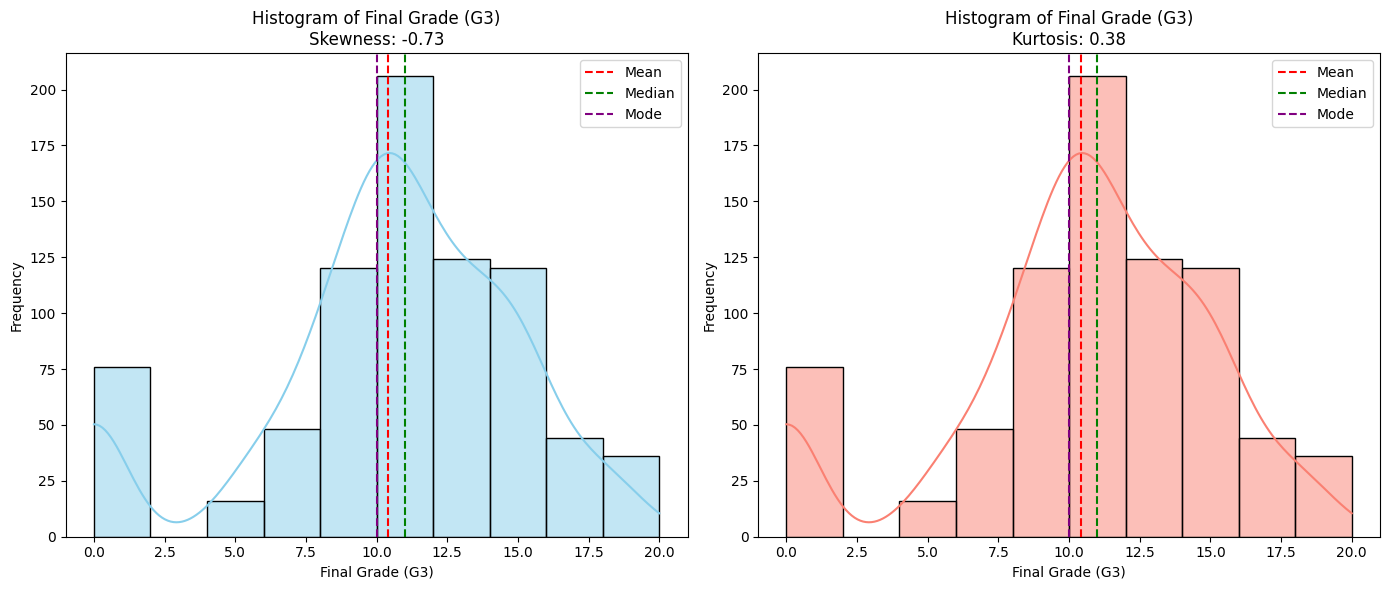

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# الرسم البياني الأول: الانحراف (Skewness)
sns.histplot(G3_series, bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
axes[0].axvline(median, color='green', linestyle='--', label='Median')
axes[0].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[0].set_title(f'Histogram of Final Grade (G3)\nSkewness: {skewness:.2f}')
axes[0].set_xlabel('Final Grade (G3)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# الرسم البياني الثاني: التفرطح (Kurtosis)
sns.histplot(G3_series, bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean, color='red', linestyle='--', label='Mean')
axes[1].axvline(median, color='green', linestyle='--', label='Median')
axes[1].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[1].set_title(f'Histogram of Final Grade (G3)\nKurtosis: {kurtosis:.2f}')
axes[1].set_xlabel('Final Grade (G3)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()




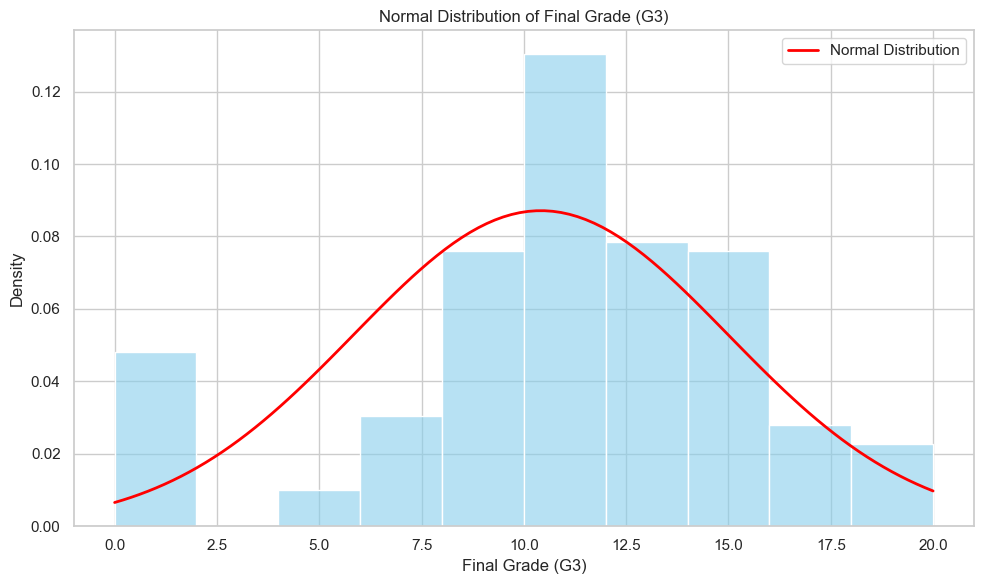

In [17]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(G3_series, bins=10, kde=False, color='skyblue', stat="density", alpha=0.6)

# Generate the x values for the normal distribution curve
x = np.linspace(G3_series.min(), G3_series.max(), 100)
# Calculate the normal distribution curve
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)

# Add titles and labels
plt.title('Normal Distribution of Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


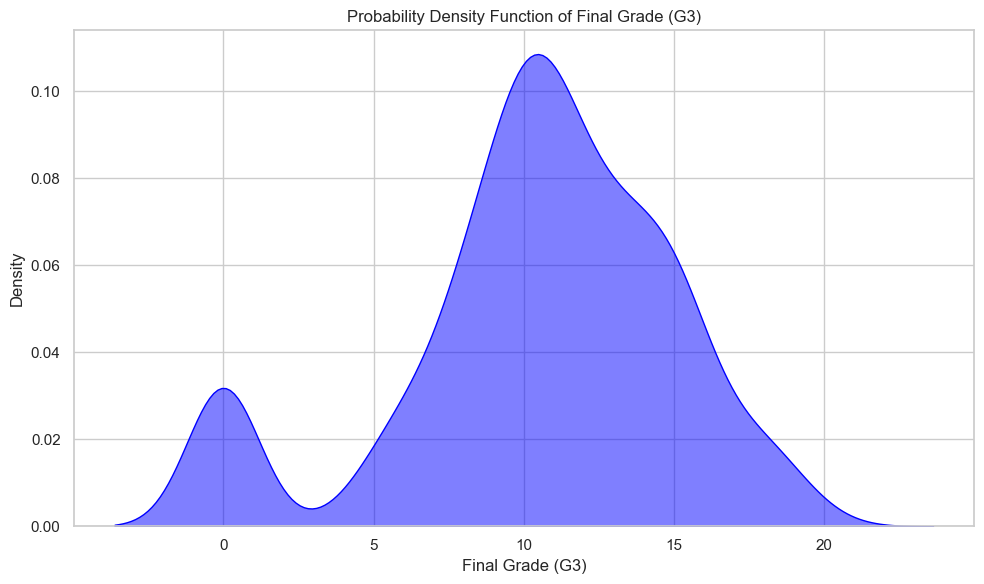

In [18]:
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function
sns.kdeplot(G3_series, color='blue', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Probability Density Function of Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


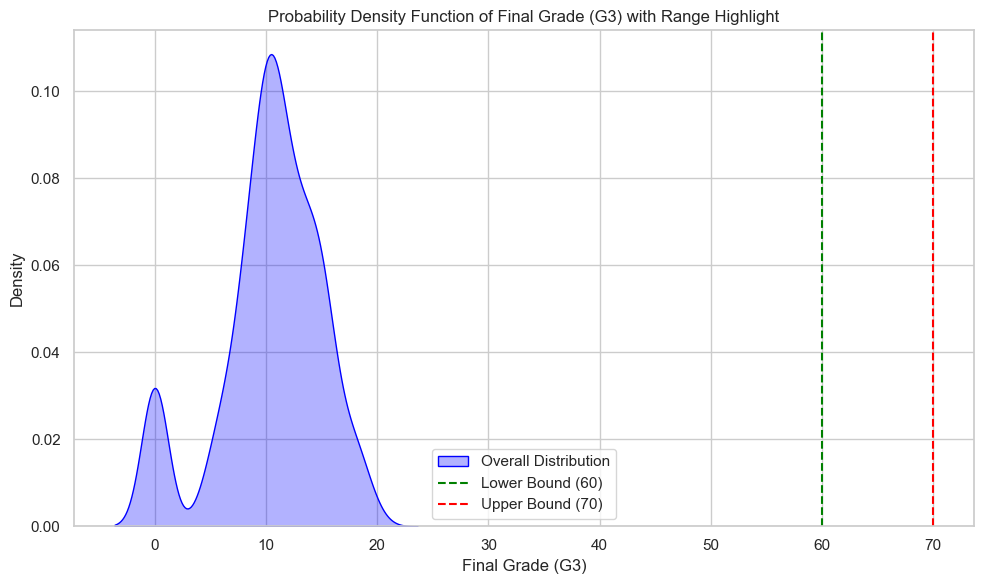

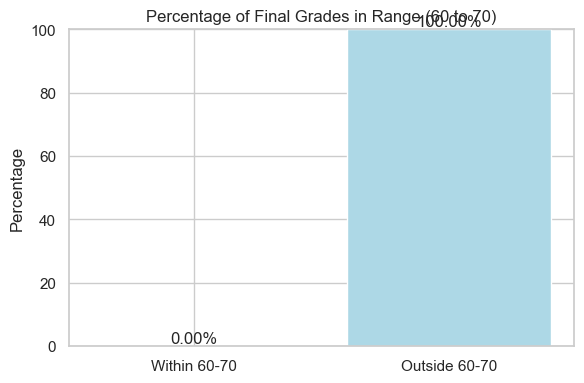

In [19]:
# Define the range for filtering
lower_bound = 60
upper_bound = 70

# Calculate the percentage of values within the specified range
filtered_data = G3_series [(G3_series  >= lower_bound) & (G3_series  <= upper_bound)]
percentage_in_range = (len(filtered_data) / len(G3_series )) * 100

sns.set(style="whitegrid")

# Create the figure for KDE
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function in the specified range
sns.kdeplot(G3_series , color='blue', fill=True, alpha=0.3, label='Overall Distribution')
sns.kdeplot(filtered_data, color='orange', fill=True, alpha=0.6, label='Filtered Range (60 to 70)')

# Add vertical lines for the range
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (60)')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (70)')

# Add titles and labels
plt.title('Probability Density Function of Final Grade (G3) with Range Highlight')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Create a bar plot for percentage representation
plt.figure(figsize=(6, 4))
plt.bar(['Within 60-70', 'Outside 60-70'], [percentage_in_range, 100 - percentage_in_range], color=['orange', 'lightblue'])
plt.title(f'Percentage of Final Grades in Range ({lower_bound} to {upper_bound})')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Show the percentage value on top of the bars
for index, value in enumerate([percentage_in_range, 100 - percentage_in_range]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the bar plot
plt.tight_layout()
plt.show()


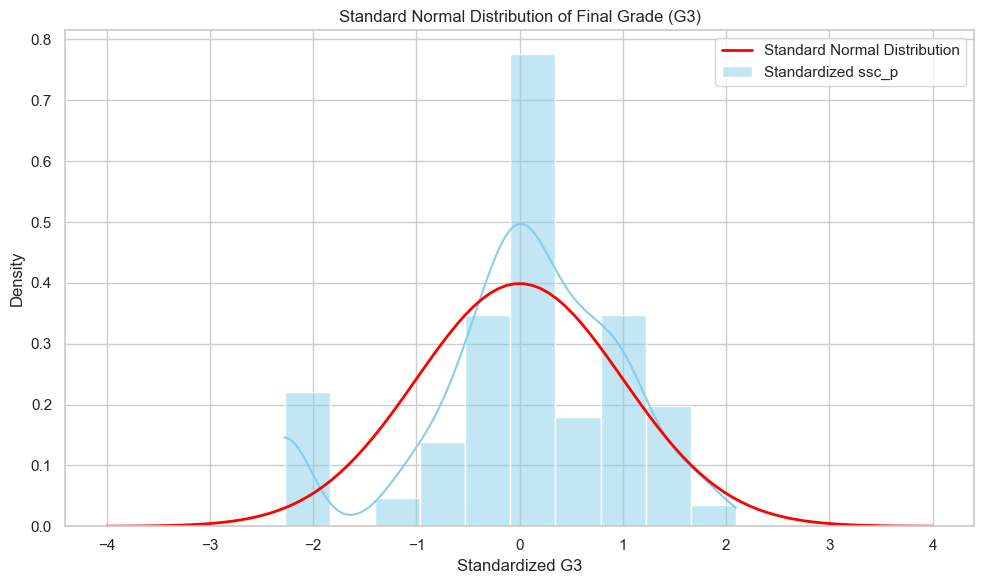

In [20]:



mean = np.mean(G3_series )
std_dev = np.std(G3_series )

# Standardize the ssc_p ratings
standardized_data = (G3_series  - mean) / std_dev

# Create a range of values for plotting the standard normal distribution
x_values = np.linspace(-4, 4, 100)  # Range for the standard normal distribution
y_values = norm.pdf(x_values, 0, 1)  # PDF for standard normal distribution

# Set the style for the plots
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the standardized data's histogram
sns.histplot(standardized_data, bins=10, kde=True, color='skyblue', stat='density', label='Standardized ssc_p')

# Plot the standard normal distribution curve
plt.plot(x_values, y_values, color='red', label='Standard Normal Distribution', lw=2)

# Add titles and labels
plt.title('Standard Normal Distribution of Final Grade (G3)')
plt.xlabel('Standardized G3')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
dataset.cov(numeric_only=True)

,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,G3
age,1.626221,-0.228329,-0.226661,-0.004428,0.230928,0.061639,0.020921,-0.110186,1.787233,-0.943415
Medu,-0.228329,1.196926,0.741775,0.059592,-0.192437,-0.003838,0.033736,-0.071258,0.877509,1.087716
Fedu,-0.226661,0.741775,1.182680,-0.008368,-0.202384,-0.001335,-0.013945,0.022275,0.212864,0.759115
studytime,-0.004428,0.059592,-0.008368,0.703432,-0.108184,0.029860,-0.119889,-0.088117,-0.420593,0.375633
failures,0.230928,-0.192437,-0.202384,-0.108184,0.552316,-0.029526,0.068242,0.067973,0.378784,-1.226375
famrel,0.061639,-0.003838,-0.001335,0.029860,-0.029526,0.802978,0.134803,0.117104,-0.317884,0.210733
freetime,0.020921,0.033736,-0.013945,-0.119889,0.068242,0.134803,0.996461,0.105039,-0.463686,0.051679
health,-0.110186,-0.071258,0.022275,-0.088117,0.067973,0.117104,0.105039,1.930494,-0.332676,-0.390181
absences,1.787233,0.877509,0.212864,-0.420593,0.378784,-0.317884,-0.463686,-0.332676,63.968362,1.254111
G3,-0.943415,1.087716,0.759115,0.375633,-1.226375,0.210733,0.051679,-0.390181,1.254111,20.963014


In [22]:
dataset.corr(numeric_only=True)


,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,G3
age,1.000000,-0.163658,-0.163438,-0.004140,0.243665,0.053940,0.016434,-0.062187,0.175230,-0.161579
Medu,-0.163658,1.000000,0.623455,0.064944,-0.236680,-0.003914,0.030891,-0.046878,0.100285,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.009175,-0.250408,-0.001370,-0.012846,0.014742,0.024473,0.152457
studytime,-0.004140,0.064944,-0.009175,1.000000,-0.173563,0.039731,-0.143198,-0.075616,-0.062700,0.097820
failures,0.243665,-0.236680,-0.250408,-0.173563,1.000000,-0.044337,0.091987,0.065827,0.063726,-0.360415
famrel,0.053940,-0.003914,-0.001370,0.039731,-0.044337,1.000000,0.150701,0.094056,-0.044354,0.051363
freetime,0.016434,0.030891,-0.012846,-0.143198,0.091987,0.150701,1.000000,0.075733,-0.058078,0.011307
health,-0.062187,-0.046878,0.014742,-0.075616,0.065827,0.094056,0.075733,1.000000,-0.029937,-0.061335
absences,0.175230,0.100285,0.024473,-0.062700,0.063726,-0.044354,-0.058078,-0.029937,1.000000,0.034247
G3,-0.161579,0.217147,0.152457,0.097820,-0.360415,0.051363,0.011307,-0.061335,0.034247,1.000000


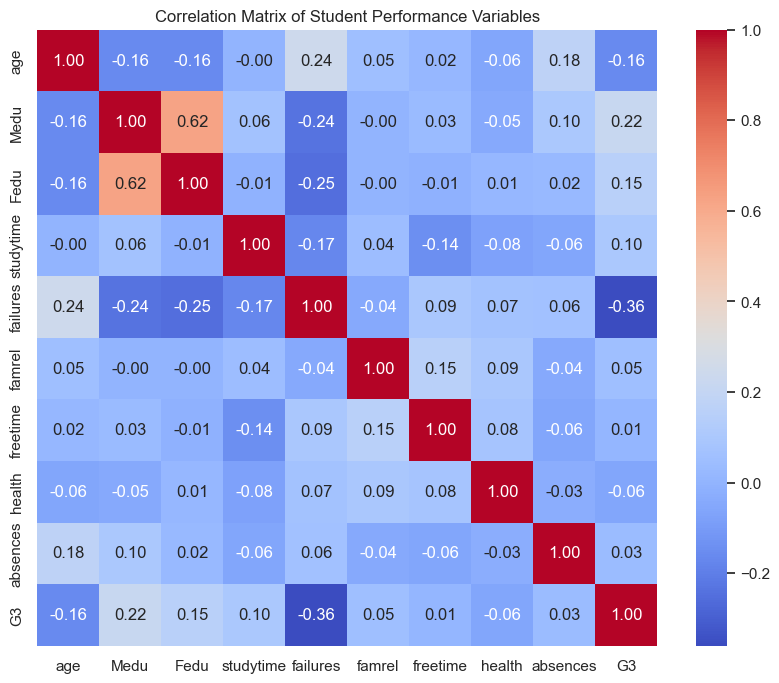

In [23]:
numerical_cols = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel',
                  'freetime', 'health', 'absences', 'G3']

corr_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Student Performance Variables')
plt.show()


In [24]:
# # Correlation heatmap for numerical columns
# numerical_cols = ['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel',
#  'freetime', 'health', 'absences', 'address', 'guardian', 'G3']

# corr_matrix = dataset[numerical_cols].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title('Correlation Matrix')
# plt.show()


In [25]:

# # Compute the correlation matrix
# correlation_matrix = dataset[numerical_cols].corr()

# # Identify positive and negative correlations
# positive_correlations = correlation_matrix[correlation_matrix > 0].stack()
# negative_correlations = correlation_matrix[correlation_matrix < 0].stack()

# print("\nPositive Correlations:")
# print(positive_correlations)

# print("\nNegative Correlations:")
# print(negative_correlations)


correlation_matrix = dataset[numerical_cols].corr()

# استخراج العلاقات الموجبة والسالبة
positive_correlations = correlation_matrix[correlation_matrix > 0].stack().sort_values(ascending=False)
negative_correlations = correlation_matrix[correlation_matrix < 0].stack().sort_values()

print("\nPositive Correlations (sorted):")
print(positive_correlations)

print("\nNegative Correlations (sorted):")
print(negative_correlations)



Positive Correlations (sorted):
age        age          1.000000
Medu       Medu         1.000000
studytime  studytime    1.000000
Fedu       Fedu         1.000000
failures   failures     1.000000
absences   absences     1.000000
freetime   freetime     1.000000
famrel     famrel       1.000000
health     health       1.000000
G3         G3           1.000000
Medu       Fedu         0.623455
Fedu       Medu         0.623455
failures   age          0.243665
age        failures     0.243665
G3         Medu         0.217147
Medu       G3           0.217147
age        absences     0.175230
absences   age          0.175230
G3         Fedu         0.152457
Fedu       G3           0.152457
famrel     freetime     0.150701
freetime   famrel       0.150701
Medu       absences     0.100285
absences   Medu         0.100285
studytime  G3           0.097820
G3         studytime    0.097820
famrel     health       0.094056
health     famrel       0.094056
freetime   failures     0.091987
failures  

In [26]:
# علاقات G3 فقط
g3_corr = correlation_matrix['G3'].drop('G3').sort_values()

print("\nCorrelation of variables with G3:")
print(g3_corr)



Correlation of variables with G3:
failures    -0.360415
age         -0.161579
health      -0.061335
freetime     0.011307
absences     0.034247
famrel       0.051363
studytime    0.097820
Fedu         0.152457
Medu         0.217147
Name: G3, dtype: float64


In [27]:

# التأكد من القيم النصية
dataset['sex'] = dataset['sex'].astype(str).str.upper()

# تقسيم البيانات
females = dataset[dataset['sex'] == 'F']['G3']
males = dataset[dataset['sex'] == 'M']['G3']

# اختبار T
t_stat, p_value = ttest_ind(females, males, nan_policy='omit')

print("T-Test Between Female and Male Final Grades (G3):")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_value:.4f}")

T-Test Between Female and Male Final Grades (G3):
T-statistic = -2.920
P-value     = 0.0036


In [28]:

young = dataset[dataset['age'] <= 16]['G3']
old = dataset[dataset['age'] > 16]['G3']

t_stat, p_value = ttest_ind(young, old, nan_policy='omit')

print("T-Test Between Age Groups (≤16 vs >16):")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_value:.4f}")


T-Test Between Age Groups (≤16 vs >16):
T-statistic = 4.177
P-value     = 0.0000


In [29]:

# from scipy.stats import ttest_ind

# ckd_bp = dataset[dataset['classification'] == 'ckd']['G3']
# non_ckd_bp = dataset[dataset['classification'] == 'notckd']['G3']
# t_stat, p_value = ttest_ind(ckd_bp, non_ckd_bp, nan_policy='omit')
# print(f"T-statistic: {t_stat}, P-value: {p_value}")


In [30]:
# G3'ü 100 üzerinden yap ve sınıfa çevir
dataset['G3'] = dataset['G3'] * 5

In [31]:
def convert_to_grade(score):
    if score >= 90:
        return 'AA'
    elif score >= 80:
        return 'BA'
    elif score >= 70:
        return 'BB'
    elif score >= 60:
        return 'CB'
    elif score >= 50:
        return 'CC'
    else:
        return 'FF'

In [32]:
dataset['G3'] = dataset['G3'].apply(convert_to_grade)

In [33]:
# Kategorik verileri sayısala çevirme
dataset['sex'] = dataset['sex'].map({'M': 0, 'F': 1})
dataset['address'] = dataset['address'].map({'U': 1, 'R': 0})
dataset

,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian,G3
0,1,18,4,4,2,0,4,3,3,6,1,mother,FF
1,1,17,1,1,2,0,5,3,3,4,1,father,FF
2,1,15,1,1,2,3,4,3,3,10,1,mother,CC
3,1,15,4,2,3,0,3,2,5,2,1,mother,BB
4,1,16,3,3,2,0,4,3,5,4,1,father,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,0,20,2,2,2,2,5,5,4,11,1,other,FF
786,0,17,3,1,1,0,2,4,2,3,1,mother,BA
787,0,21,1,1,1,3,5,5,3,3,0,other,FF
788,0,18,3,2,1,0,4,4,5,0,0,mother,CC


In [34]:
# Özellikler
X = dataset[['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
        'famrel', 'freetime', 'health', 'absences', 'address', 'guardian']]

# guardian sütununu one-hot encoding ile çevir
X = pd.get_dummies(X, columns=['guardian'], drop_first=True)

y = dataset["G3"]

In [35]:
# Eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# ID3 algoritması ile model (entropy -> ID3)
clf = DecisionTreeClassifier(criterion="entropy", random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [37]:
# Test verisi ile tahmin yap
y_pred = clf.predict(X_test)

In [38]:
# Başarıyı değerlendir
print("Doğru Tahmin Oranı :", accuracy_score(y_test, y_pred))
print("\nSınıflandırma (ID3):\n", classification_report(y_test, y_pred))

Doğru Tahmin Oranı : 0.8987341772151899

Sınıflandırma (ID3):
               precision    recall  f1-score   support

          AA       1.00      1.00      1.00         2
          BA       0.60      1.00      0.75        12
          BB       1.00      0.90      0.95        20
          CB       0.93      0.86      0.89        29
          CC       0.94      0.79      0.86        38
          FF       0.93      0.96      0.95        57

    accuracy                           0.90       158
   macro avg       0.90      0.92      0.90       158
weighted avg       0.92      0.90      0.90       158



In [39]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

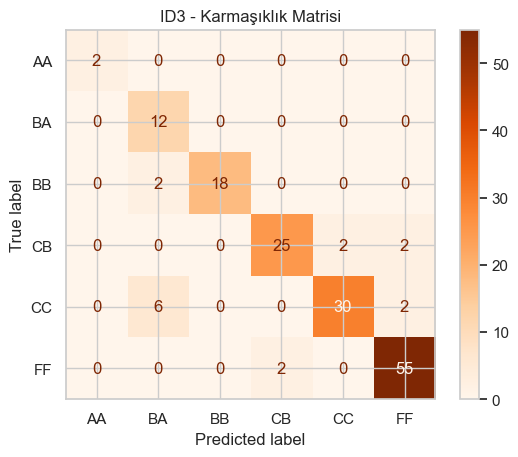

In [40]:
disp.plot(cmap=plt.cm.Oranges)
plt.title("ID3 - Karmaşıklık Matrisi")
plt.show()

In [41]:
# Sınıf isimlerini otomatik al
class_names = clf.classes_

In [42]:
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

In [43]:
graph = graphviz.Source(dot_data)
graph.render("iris_id3_tree", format="png", cleanup=True)  # Ağacı PNG olarak kaydeder
graph.view() 

'iris_id3_tree.pdf'